In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
zoo_data = pd.read_csv("Zoo.csv")


In [3]:
print(zoo_data.head())


  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [4]:
print("\nMissing values:")
print(zoo_data.isnull().sum())


Missing values:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [5]:
print("\nSummary Statistics:")
print(zoo_data.describe())



Summary Statistics:
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std   

In [9]:
# Check the column names of the DataFrame
print(zoo_data.columns)


Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


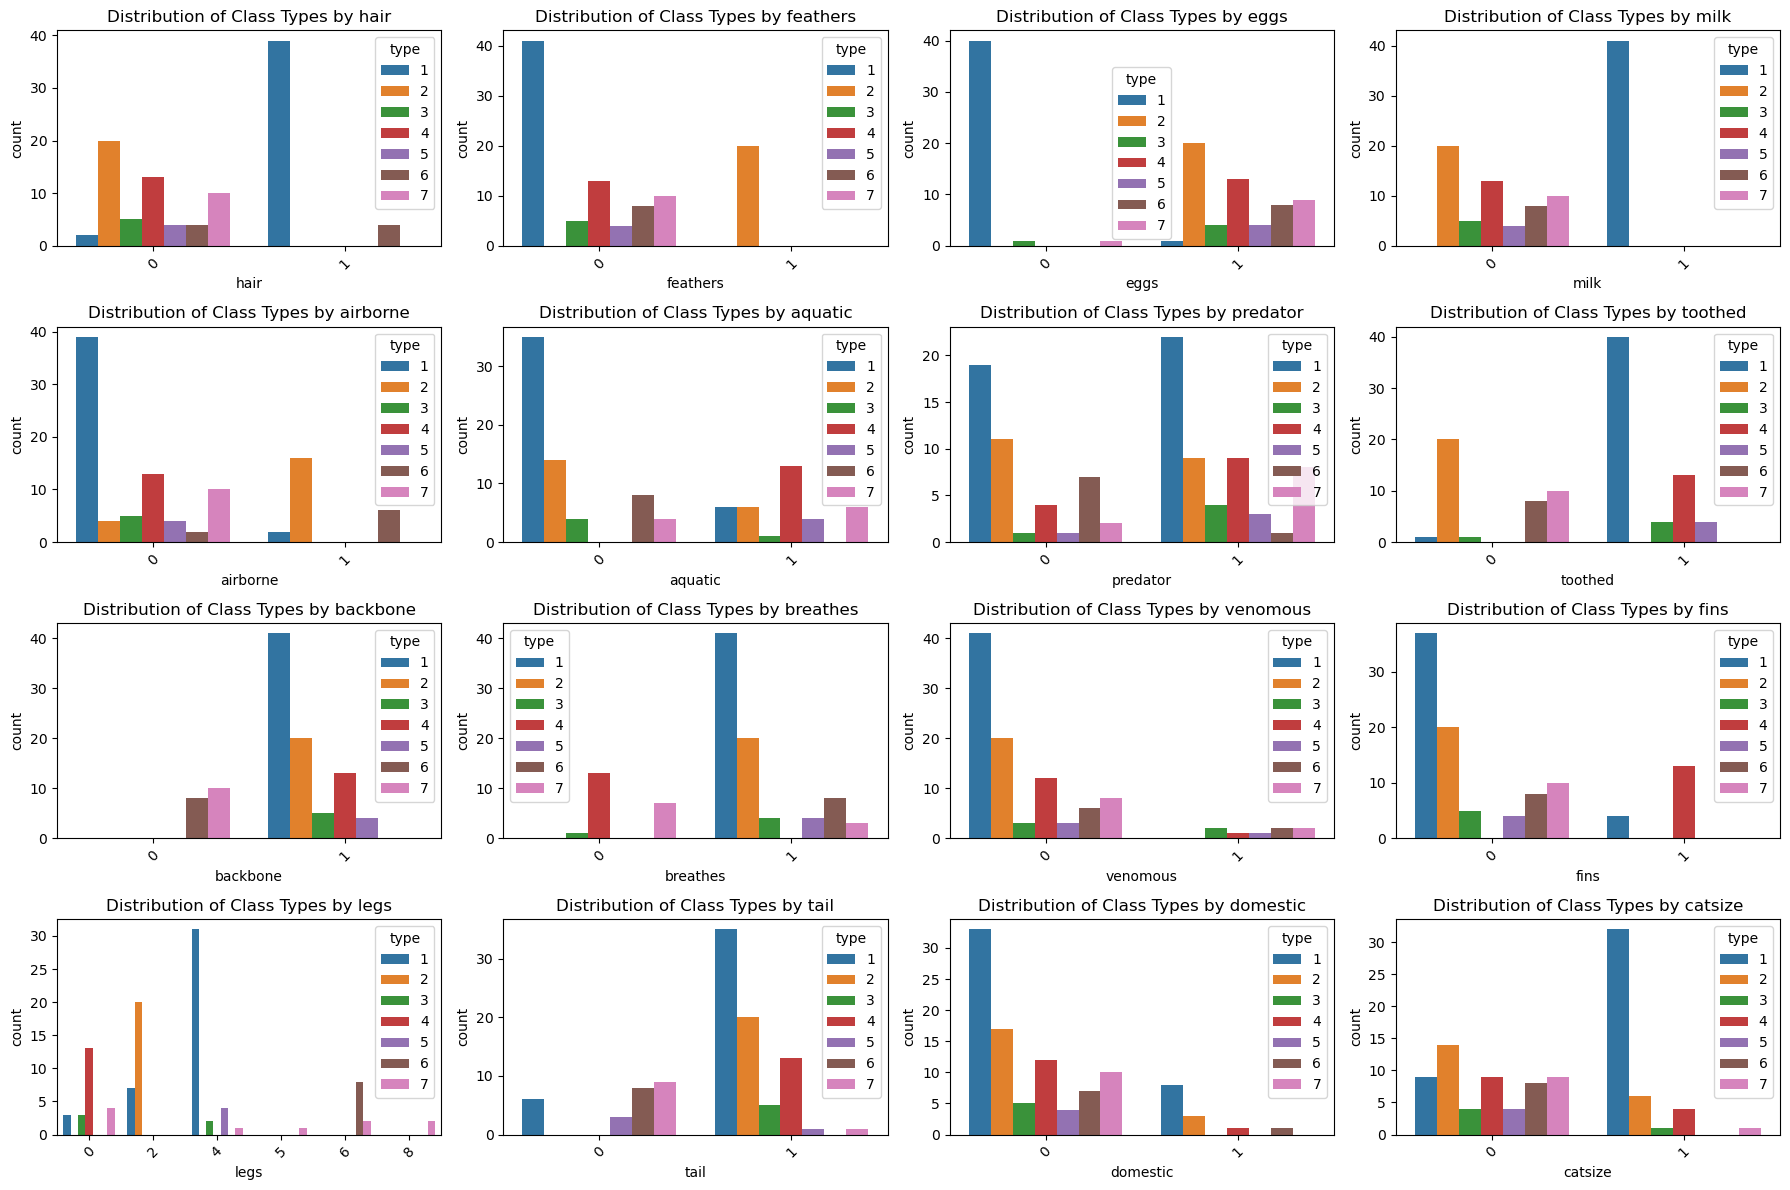

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot countplots for each feature
plt.figure(figsize=(18, 12))
for i, column in enumerate(zoo_data.columns[1:-1], 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=column, hue='type', data=zoo_data)
    plt.title(f'Distribution of Class Types by {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Data Preprocessing
# Assuming 'zoo_data' contains your data
X = zoo_data.drop(columns=['animal name', 'type'])  # Features
y = zoo_data['type']  # Target

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Model Training
k = 3  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)



KNeighborsClassifier(n_neighbors=3)

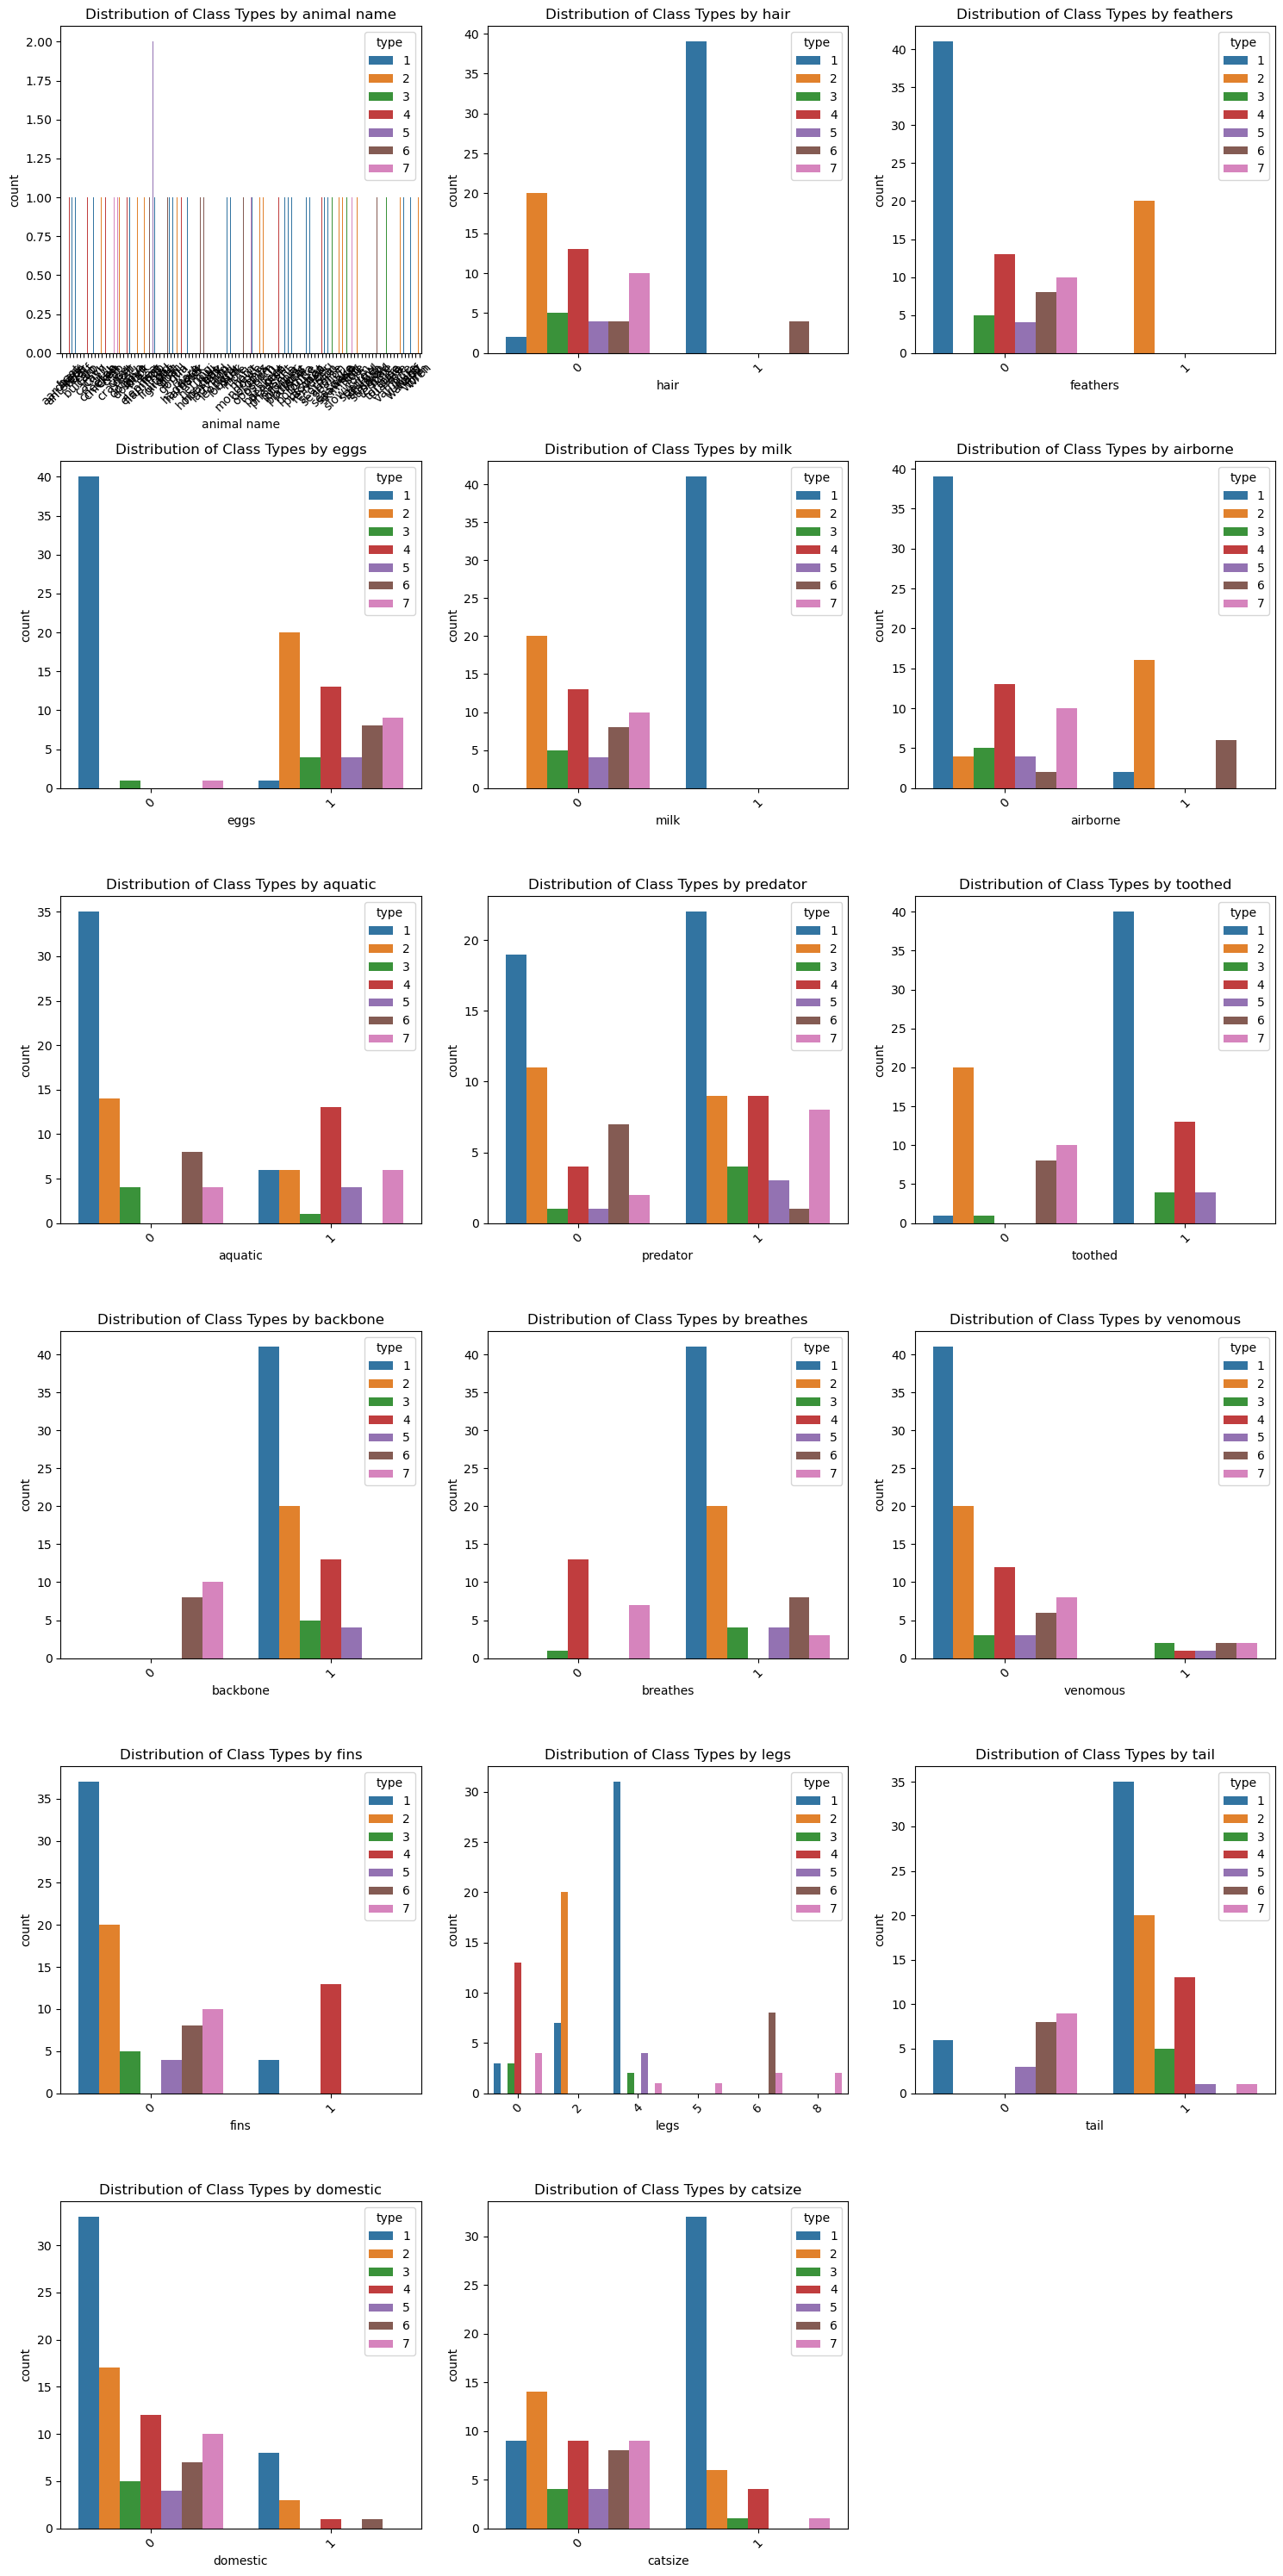

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of each feature by class type
num_features = len(zoo_data.columns[:-1])
num_rows = (num_features - 1) // 3 + 1  # Calculate the number of rows needed
plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(zoo_data.columns[:-1], 1):
    plt.subplot(num_rows, 3, i)
    sns.countplot(x=column, hue='type', data=zoo_data)
    plt.title(f'Distribution of Class Types by {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [19]:
print(zoo_data.columns)
X = zoo_data.drop('type', axis=1)
y = zoo_data['type']


Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
X_encoded = pd.get_dummies(X, columns=['animal name'])


In [26]:
print(zoo_data.columns)


Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming you have categorical_cols as a list of column names of categorical features
categorical_cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
                    'aquatic', 'predator', 'toothed', 'backbone', 
                    'breathes', 'venomous', 'fins', 'legs', 'tail', 
                    'domestic', 'catsize']

# Create a column transformer to apply one-hot encoding to categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
ct = ColumnTransformer([('encoder', encoder, categorical_cols)], remainder='passthrough')

# Fit and transform the training data
X_train_encoded = ct.fit_transform(X_train)

# Transform the test data using the fitted transformer
X_test_encoded = ct.transform(X_test)

# Now you can proceed to fit the classifier and make predictions


C:\Users\gkhya\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

